In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, boxcox
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

matplotlib.rcParams["font.size"] = 25
matplotlib.rcParams['figure.figsize'] = [10,10]

In [2]:
train_init = pd.read_csv('train.csv')
test_init = pd.read_csv('test.csv')

In [3]:
train_init.head() #show the first elements of the training sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_init.describe() #Show some relevant parameters of feature distributions

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
mask = train_init.isna().any()
col_nan = train_init.columns[mask] #fhese features contain NaN
print(col_nan)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [6]:
train_init[col_nan].isna().sum() #count the missing value for each feature

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# 1. Dataset inspection

First, let us observe the distribution of the target feature, `SalePrice`:

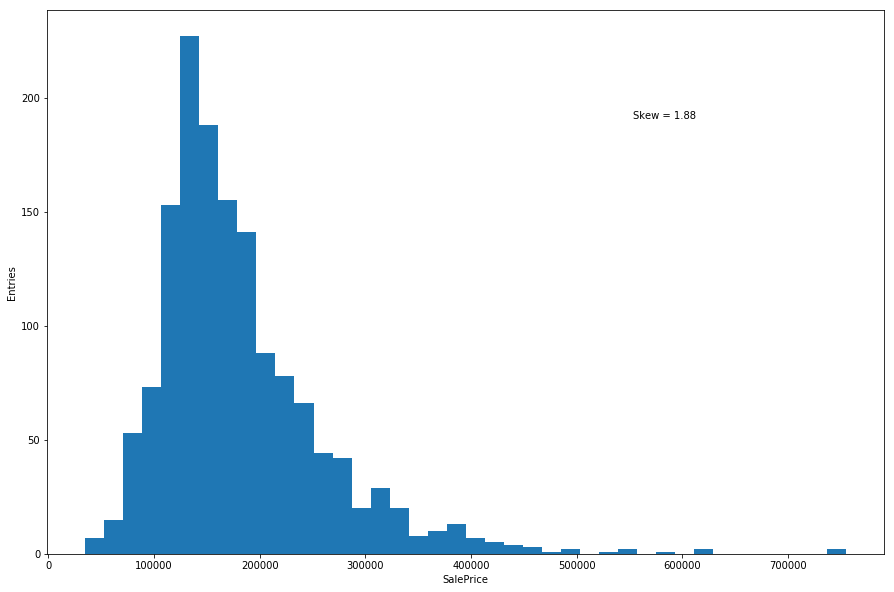

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))

SalePriceSkewness = train_init['SalePrice'].skew()
plt.hist(train_init['SalePrice'], bins=40)
plt.text(0.7, 0.8, 'Skew = {:.2f}'.format(SalePriceSkewness), transform=ax.transAxes)
plt.xlabel('SalePrice')
plt.ylabel('Entries')

plt.show()

The distribution is smooth but asymmetric, peaking at ~150

Let us investigate which variables might be the most correlated with the sale price. We start with a heatmap:

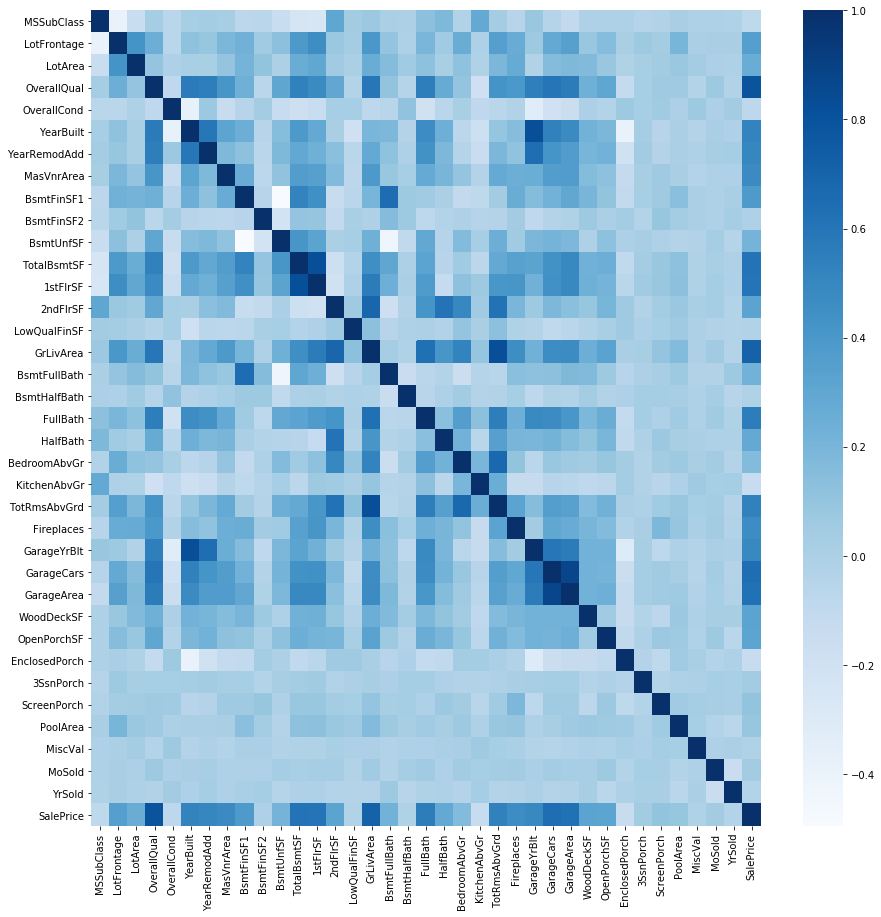

In [8]:
matplotlib.rcParams["font.size"] = 10
plt.figure(figsize= (15 , 15))
sns.heatmap(train_init.drop("Id", axis = 1).corr(),cmap="Blues")

From a first inspection, it seems that `OverallQual`, `GrLivArea`, and `GarageCars` are powerful features. Let us start considering real value features, and then discrete value ones

## 1.1 Real Value Features

In [9]:
real_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
                 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
                 '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageYrBlt',
                 'EnclosedPorch', 'ScreenPorch']

### 1.1.1 Handling missing values

Some features contain NaN values (see above). Let us estimate the NaN values using the `IterativeImputer` provided by `sklearn`

In [10]:
imputer = IterativeImputer()
imputed_train = pd.DataFrame(imputer.fit_transform(train_init[real_features]), columns=list(train_init[real_features]))
imputed_test  = pd.DataFrame(imputer.transform(test_init[real_features]), columns=list(test_init[real_features]))

for var in real_features:
    train_init[var] = imputed_train[var]
    test_init[var]  = imputed_test[var]

### 1.1.2 Data Visualization & Correlation Estimation

In [11]:
def make_scatter(varname1, varname2, ax):
    if np.average(train_init[varname2])>1000: train_init[varname2]=train_init[varname2]/1000.
    ax.scatter(train_init[varname1], train_init[varname2])
    ax.set_xlabel(varname1)
    ax.set_ylabel(varname2)

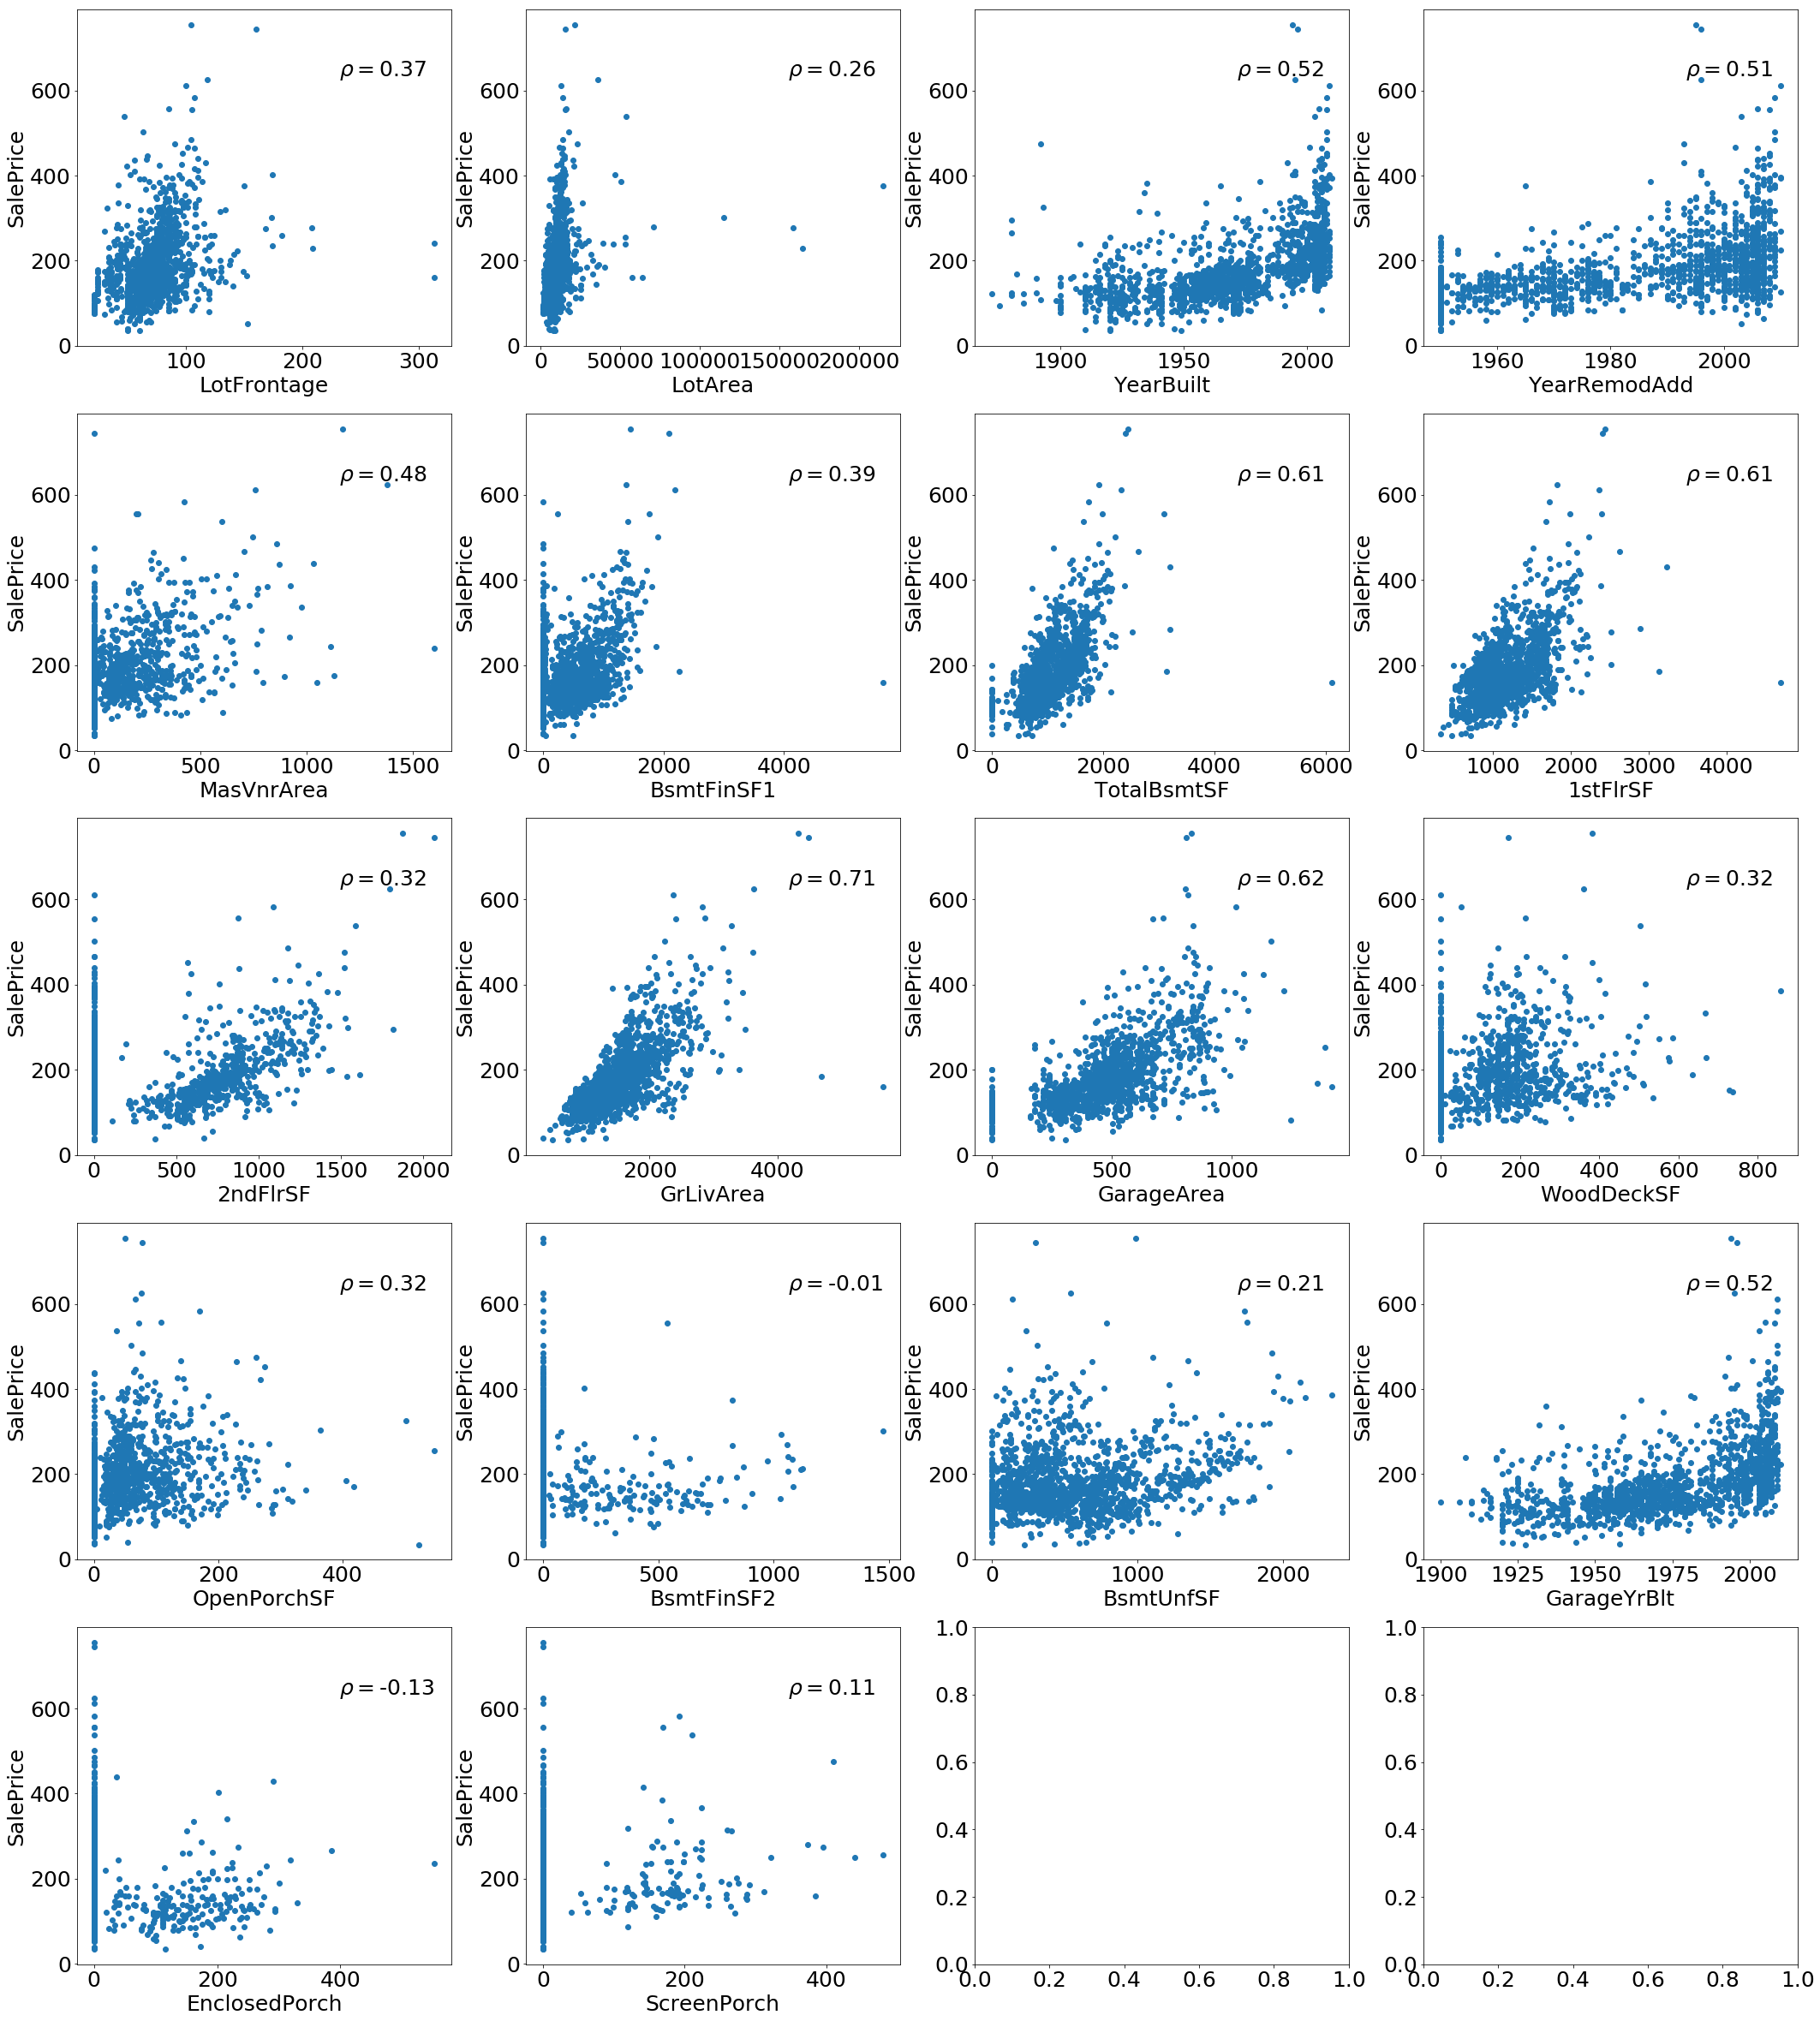

In [12]:
matplotlib.rcParams["font.size"] = 25

rho = []

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(36, 42))

for ivar, var in enumerate(real_features):
    row = int(ivar/4)
    col = ivar%4
    make_scatter(var, 'SalePrice', axs[row, col])
    rho.append(pearsonr(train_init[var], train_init['SalePrice'])[0])
    plt.text(0.7, 0.8, r'$\rho=${:.2f}'.format(rho[-1]), transform=axs[row, col].transAxes)

plt.show()

We observe that two features have $\rho=\mathrm{NaN}$, as a consequence of some NaN rows.

Some features show a high degree of correlation with the sale price (rho>60%). Neverthless, some might be cross-correlated, hence not providing much more information than a single feature. Below is the list of real-value features with the corresponding correlation

In [13]:
real_feat = pd.DataFrame({
    'variable': real_features,
    'rho': rho
})

real_feat.sort_values(by=['rho'], ascending=False)

,rho,variable
9,0.708624,GrLivArea
10,0.623431,GarageArea
6,0.613581,TotalBsmtSF
7,0.605852,1stFlrSF
2,0.522897,YearBuilt
15,0.518903,GarageYrBlt
3,0.507101,YearRemodAdd
4,0.477808,MasVnrArea
5,0.386420,BsmtFinSF1
0,0.369610,LotFrontage


Now we want to check about possible cross-correlations among the 7 top variables ($\rho>50\%$)

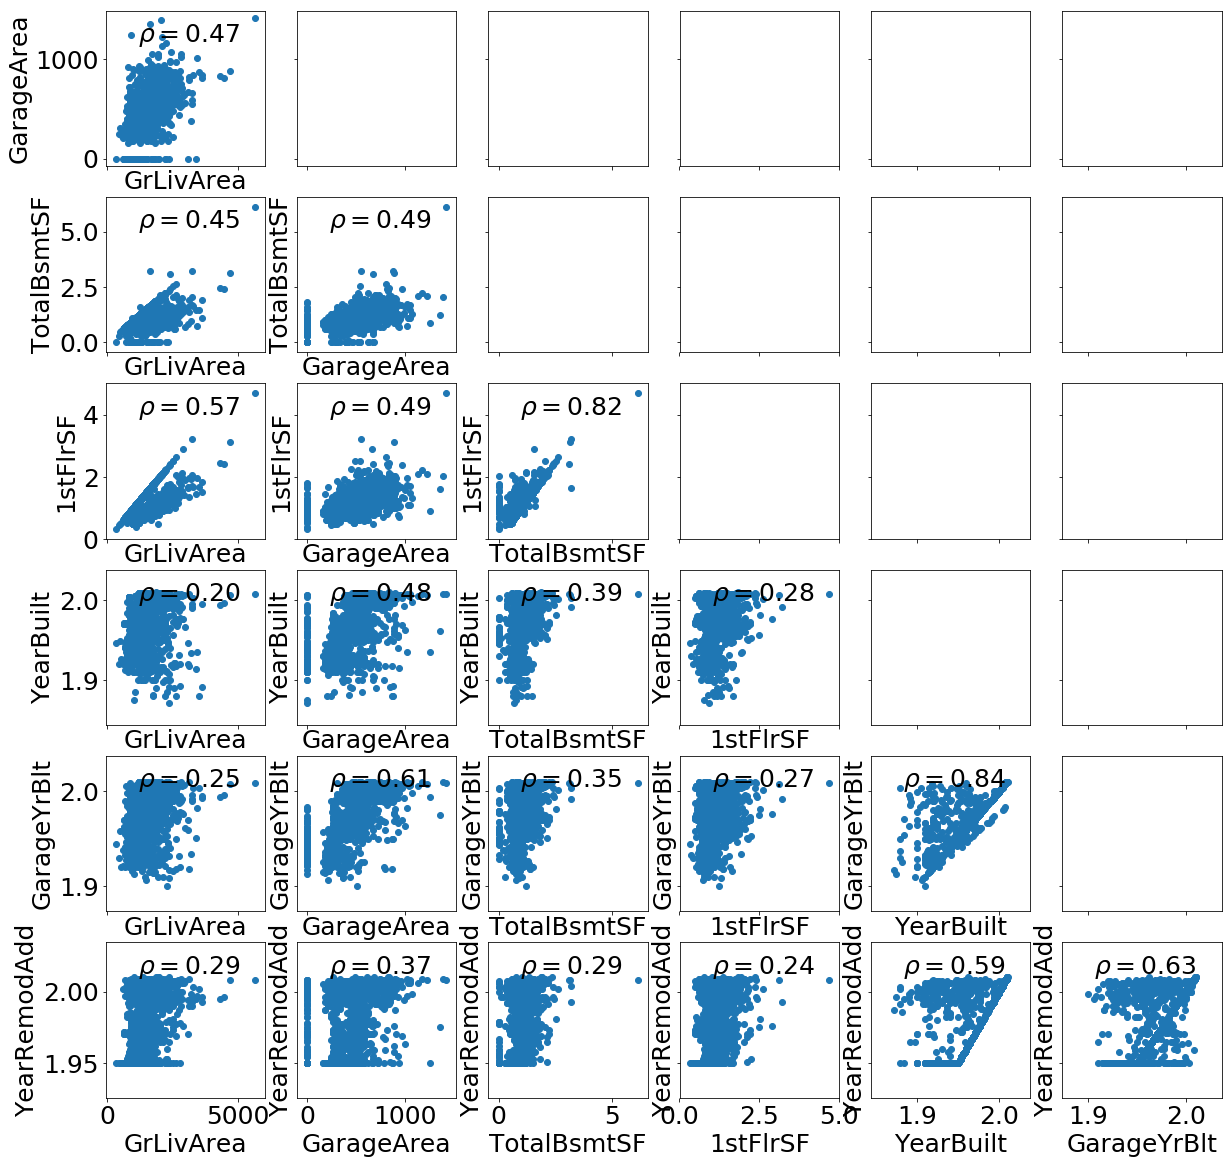

In [14]:
sel_var = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd']
n=len(sel_var)-1

fig, axs = plt.subplots(nrows=n, ncols=n, figsize=(20, 20), sharex='col', sharey='row')

for i1, var1 in enumerate(sel_var):
    for i2, var2 in enumerate(sel_var):
        if i1>=i2: continue
        row = i2-1
        col = i1
        make_scatter(var1, var2, axs[row, col])
        plt.text(0.2, 0.8, r'$\rho=${:.2f}'.format(pearsonr(train_init[var1], train_init[var2])[0]),
                 transform=axs[row, col].transAxes)

plt.show()

We observe that `1stFlrSF` is highly cross-correlated with the other 3 variables, especially with `TotalBsmtSF`. We discard `1stFlrSF`. On the other hand, we see that `YearBuilt` is mostly uncorrelated with the other features, except for `GarageYrBlt`. However, `YearBuilt` has a better discrimination power, so we discard `GarageYrBlt` as well. Thus, we might want to retain the following real-value variables:
 * GrLivArea
 * GarageArea
 * TotalBsmtSF
 * YearBuilt
 * YearRemodAdd

## 1.2 Discrete Value Features

In [15]:
discrete_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF',
                     'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                     'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',
                     'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

### 1.2.1 Handling Missing Values

Discrete features have no missing values:

In [16]:
train_init[discrete_features].isna().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
LowQualFinSF    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
3SsnPorch       0
PoolArea        0
MiscVal         0
MoSold          0
YrSold          0
dtype: int64

### 1.2.2 Data Visualization

Let us make boxplot of these features:

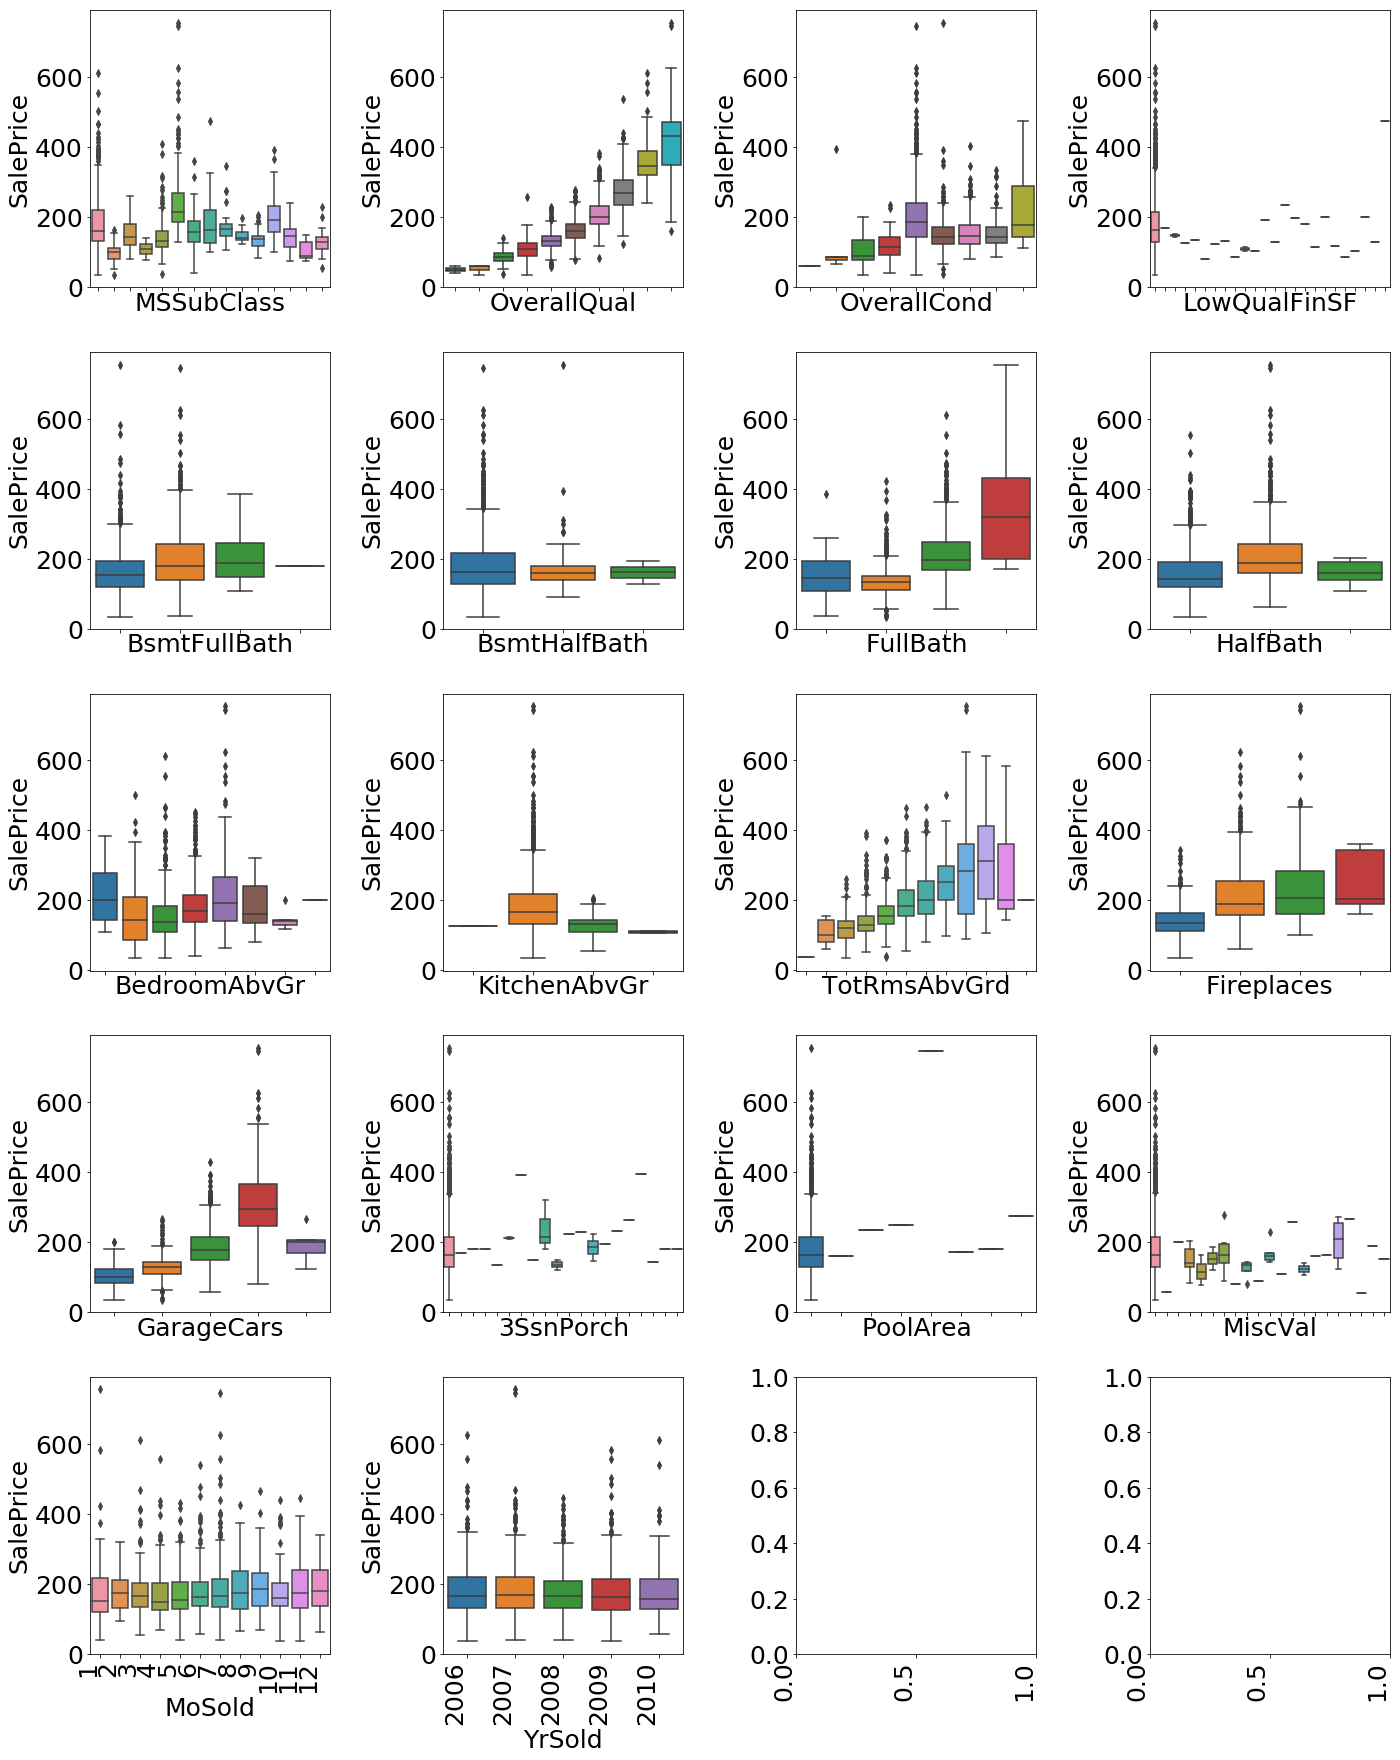

In [17]:
nrows, ncols = 5, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))
fig.autofmt_xdate(rotation= 90)

for ivar, var in enumerate(discrete_features):
    row = int(ivar/ncols)
    col = ivar%ncols
    sns.boxplot(x=var, y="SalePrice", data=train_init, ax=axs[row, col])
plt.tight_layout()
plt.show()

`OverallQual` seems a very powerful feature. Similarly, `TotRmsAbvGrd`, `BsmtHalfBath`, and `GarageCars` seem strong features.

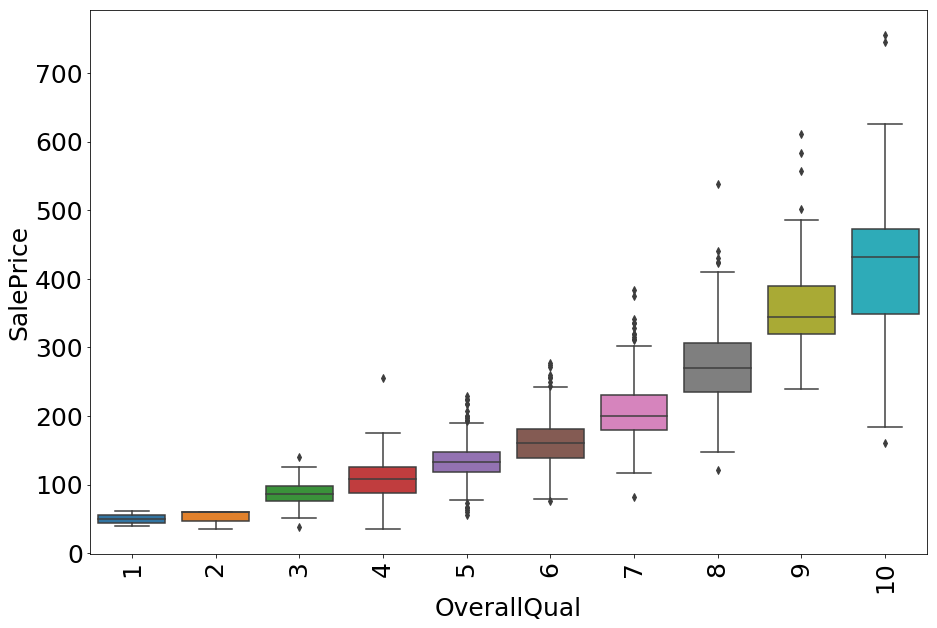

In [18]:
plt.subplots(figsize=(15, 10))

sns.boxplot(x='OverallQual', y="SalePrice", data=train_init)
plt.xticks(rotation = 90)

plt.show()

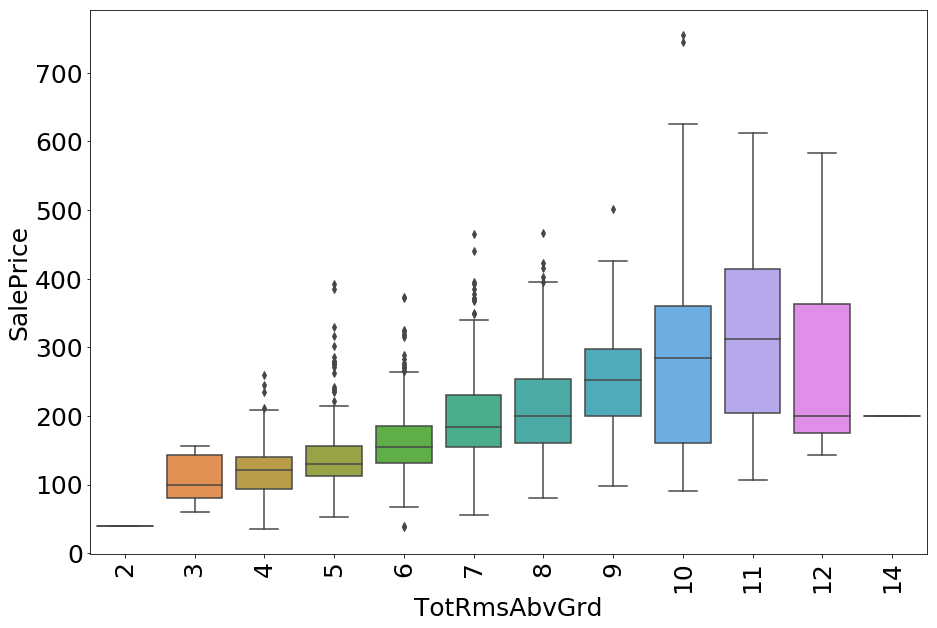

In [19]:
plt.subplots(figsize=(15, 10))

sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=train_init)
plt.xticks(rotation = 90)

plt.show()

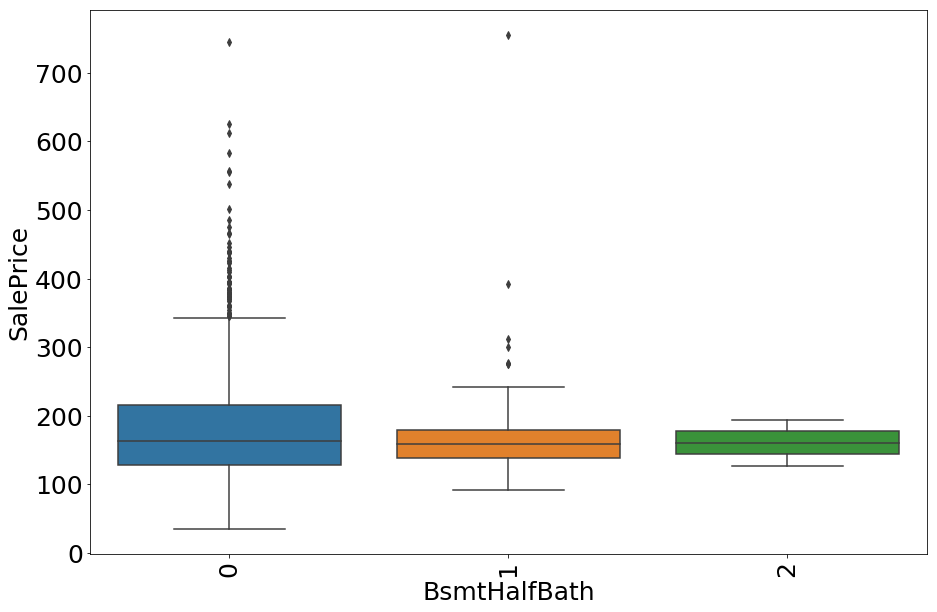

In [20]:
plt.subplots(figsize=(15, 10))

sns.boxplot(x='BsmtHalfBath', y="SalePrice", data=train_init)
plt.xticks(rotation = 90)

plt.show()

Nevertheless, `BsmtHalfBath` has a strongly asymmetric distribution, with most of the events at 0, and we might want to discard it:

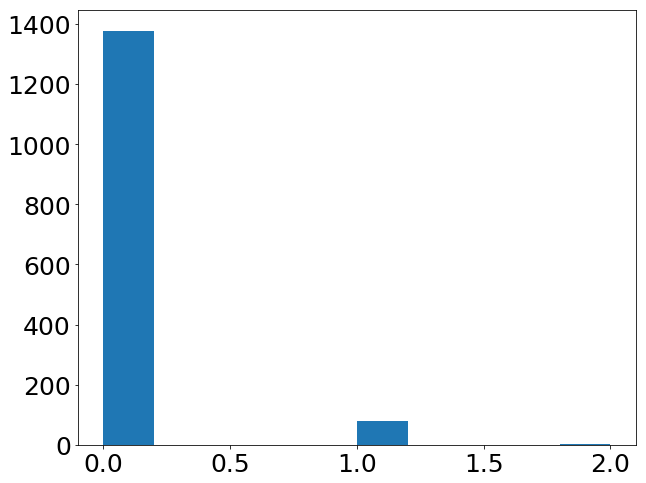

In [21]:
plt.figure(figsize=(10, 8))

plt.hist(train_init['BsmtHalfBath'])

plt.show()

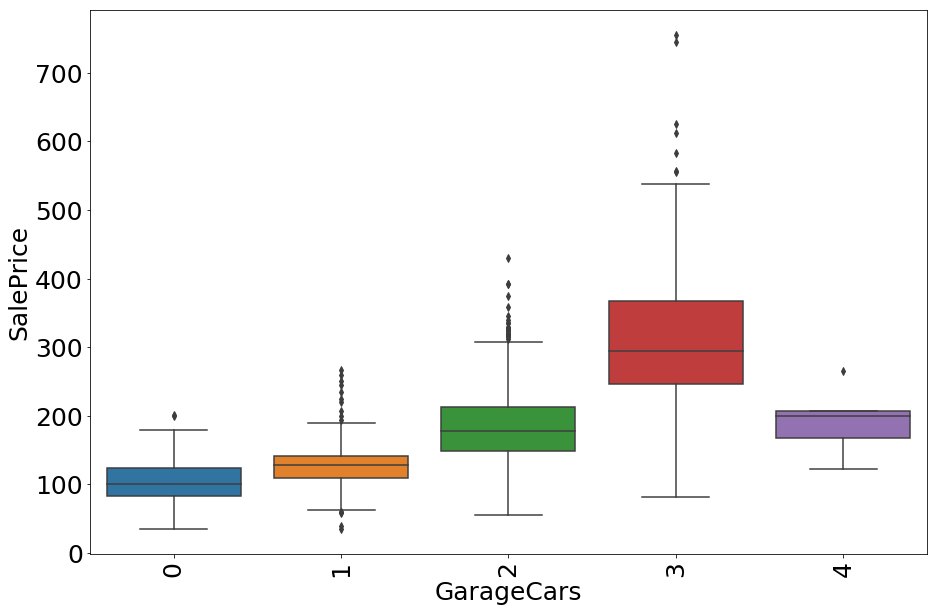

In [22]:
plt.subplots(figsize=(15, 10))

sns.boxplot(x='GarageCars', y="SalePrice", data=train_init)
plt.xticks(rotation = 90)

plt.show()

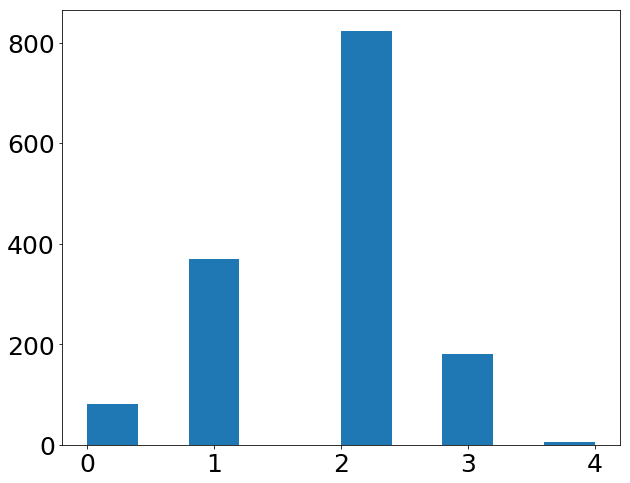

In [23]:
plt.figure(figsize=(10, 8))

plt.hist(train_init['GarageCars'])

plt.show()

We retain the following discrete value features:
 * OverallQual
 * TotRmsAbvGrd
 * GarageCars

## 1.3 Categorical Features

In [24]:
categorical_features = train_init.select_dtypes(include=['object']).columns #select discrete features, type str
print('Categorical features:\n', categorical_features)

Categorical features:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### 1.3.1 Data Visualization

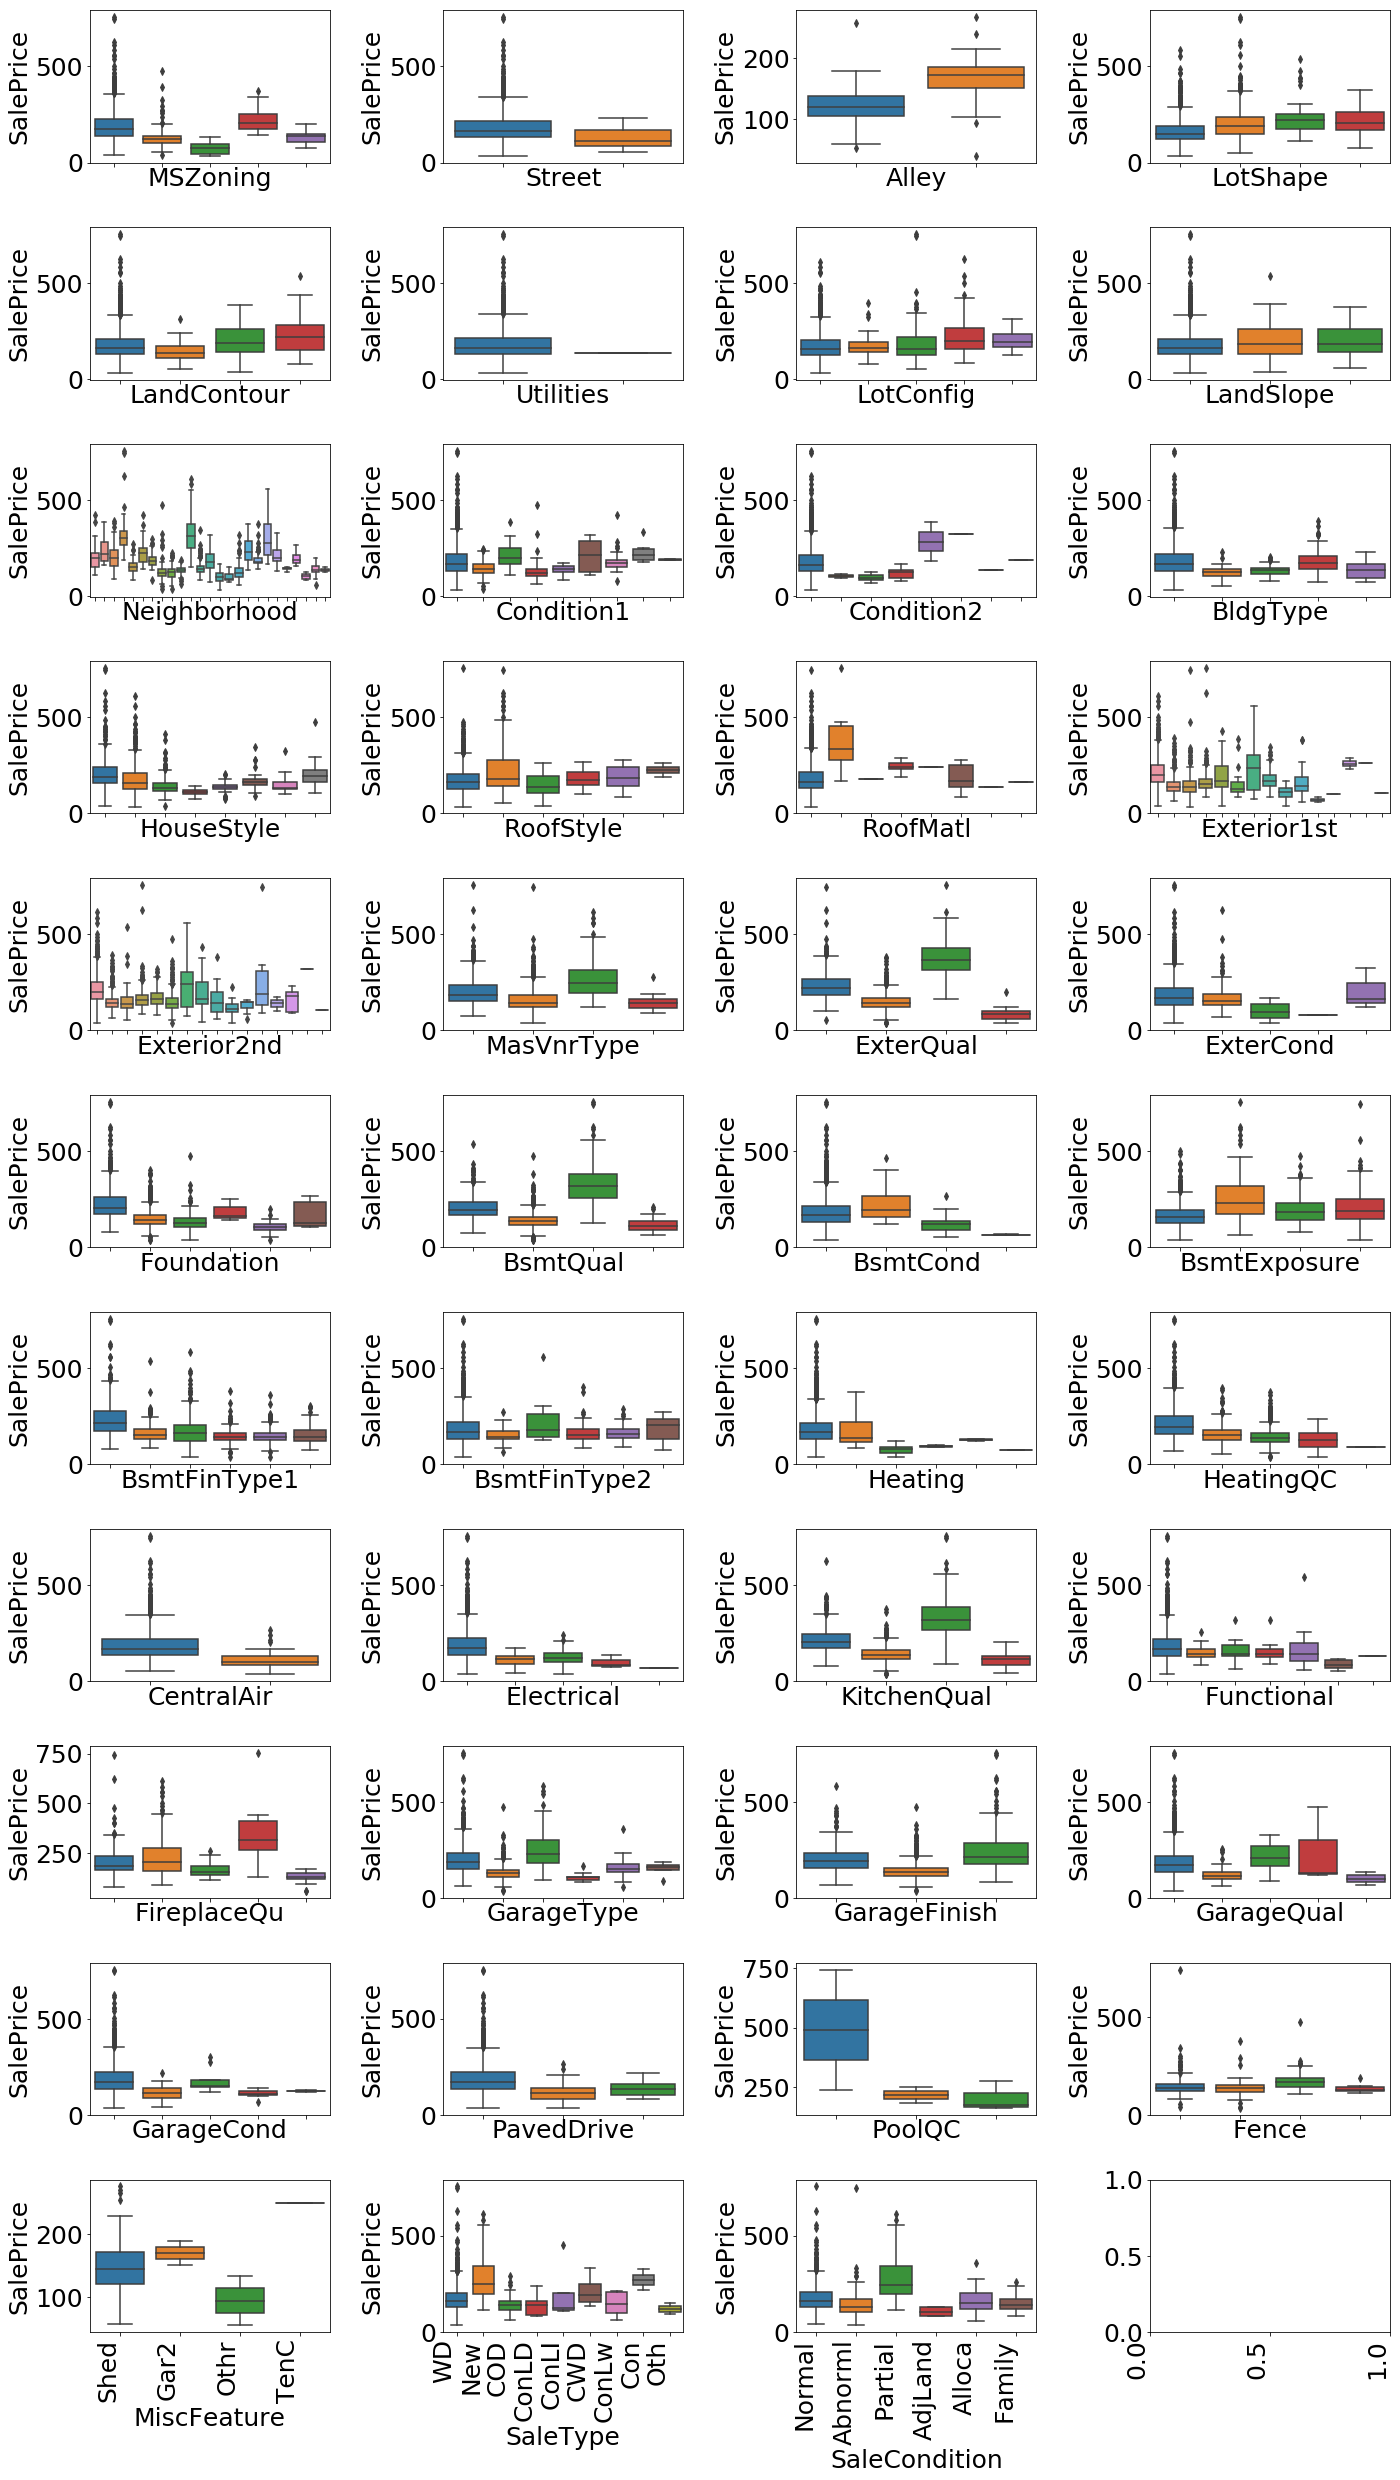

In [25]:
nrows, ncols = 11, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 35))
fig.autofmt_xdate(rotation= 90)

for ivar, var in enumerate(categorical_features):
    row = int(ivar/ncols)
    col = ivar%ncols
    sns.boxplot(x=var, y="SalePrice", data=train_init, ax=axs[row, col])
plt.tight_layout()
plt.show()

The following features seem to be good: `MSZoning`, `Alley`, `Neighborhood`, `ExterQual`, `BsmtQual`, `BsmtCond`', `KitchenQual`, `PoolQC`, `MiscFeature`.

In [26]:
selected_cat_feature = ['MSZoning', 'Alley', 'Neighborhood', 'ExterQual',
                        'BsmtQual', 'BsmtCond', 'KitchenQual', 'PoolQC', 'MiscFeature']

### 1.3.2 Handling Missing Values

Some selected categorical features are highly imbalanced, as they contain many NaN values:

In [27]:
train_init[selected_cat_feature].isna().sum() #count the missing value for each feature

MSZoning           0
Alley           1369
Neighborhood       0
ExterQual          0
BsmtQual          37
BsmtCond          37
KitchenQual        0
PoolQC          1453
MiscFeature     1406
dtype: int64

In these cases, a NaN value is an indicator of a missing characteristic (e.g. the pool in `PoolQC`). We can therefore set those NaN values to a string None

In [28]:
for var in selected_cat_feature:
    train_init[var].fillna('None', inplace=True)
    test_init[var].fillna('None', inplace=True)

We can now visually see how imbalanced the following three features are:

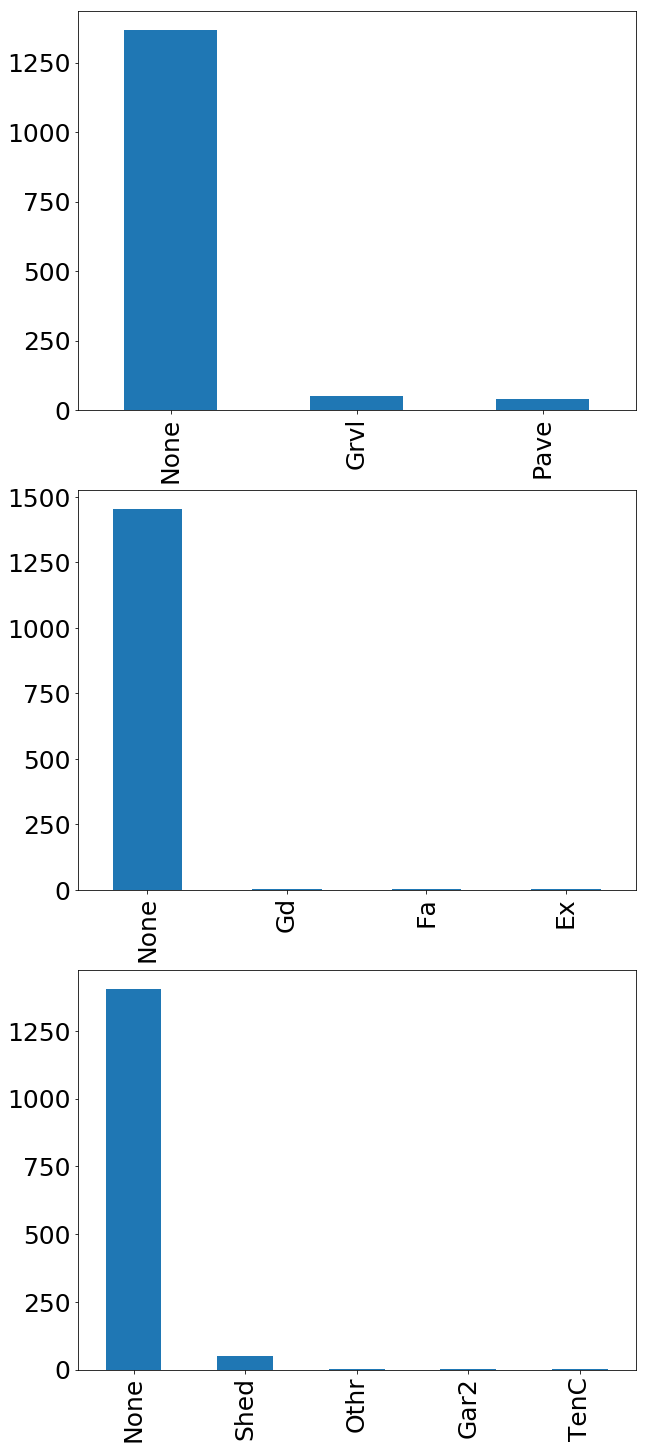

In [29]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,25))

train_init['Alley'].value_counts().plot(kind='bar', ax=axs[0])
train_init['PoolQC'].value_counts().plot(kind='bar', ax=axs[1])
train_init['MiscFeature'].value_counts().plot(kind='bar', ax=axs[2])
#plt.yscale('log')

plt.show()

### 1.3.3 Encoding Categorical Features

The values of the selected categorical features are listed below:

In [30]:
for var in selected_cat_feature:
    print(var)
    print(np.unique(train_init[var]))

MSZoning
['C (all)' 'FV' 'RH' 'RL' 'RM']
Alley
['Grvl' 'None' 'Pave']
Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
ExterQual
['Ex' 'Fa' 'Gd' 'TA']
BsmtQual
['Ex' 'Fa' 'Gd' 'None' 'TA']
BsmtCond
['Fa' 'Gd' 'None' 'Po' 'TA']
KitchenQual
['Ex' 'Fa' 'Gd' 'TA']
PoolQC
['Ex' 'Fa' 'Gd' 'None']
MiscFeature
['Gar2' 'None' 'Othr' 'Shed' 'TenC']


To encode categorical features, we distinguish between ordinal features and not. For ordinal features, we use the `OrdinalEncoder` provided with sklearn

In [31]:
# ORDINAL FEATURES
#as some categories might appear in the test data but not in the train data,
#we need to apply the encoder to the train+test data
all_data = pd.concat([train_init, test_init], sort=False).reset_index(drop=True)
ord_encoder = OrdinalEncoder(categories=[['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
for var in ['ExterQual', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'PoolQC']:
    all_data[var] = ord_encoder.fit_transform(all_data[[var]])
    train_init[var] = all_data[var][:len(train_init)]
    test_init[var]  = all_data[var][len(train_init):]
    
# NON-ORDINAL FEATURES
lab_encoder = LabelEncoder()
for var in ['MSZoning', 'Alley', 'Neighborhood', 'MiscFeature']:
    all_data[var] = lab_encoder.fit_transform(all_data[[var]])
    train_init[var] = all_data[var][:len(train_init)]
    test_init[var]  = all_data[var][len(train_init):]

/home/francesco/.local/lib/python3.5/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We verify that all the selected categorical features have been encoded:

In [32]:
for var in selected_cat_feature:
    print(var)
    print(np.unique(train_init[var]))

MSZoning
[0 1 3 4 5]
Alley
[0 1 2]
Neighborhood
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
ExterQual
[2. 3. 4. 5.]
BsmtQual
[0. 2. 3. 4. 5.]
BsmtCond
[0. 1. 2. 3. 4.]
KitchenQual
[2. 3. 4. 5.]
PoolQC
[0. 2. 4. 5.]
MiscFeature
[0 1 2 3 4]


Given the highly imbalance of some features, we only select the following categorical features:
 * MSZoning
 * Neighborhood
 * ExterQual
 * BsmtQual
 * BsmtCond
 * KitchenQual

# 2. Symmetrizing Skewed Data

The selected features to train the model are the following:

In [33]:
sel_features = [
    'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd',
    'OverallQual', 'TotRmsAbvGrd', 'GarageCars',
    'MSZoning', 'Neighborhood', 'ExterQual', 'BsmtQual', 'BsmtCond', 'KitchenQual'
               ]

Some are highly asymmetric. We parametrize the asymmetry with the skewness.

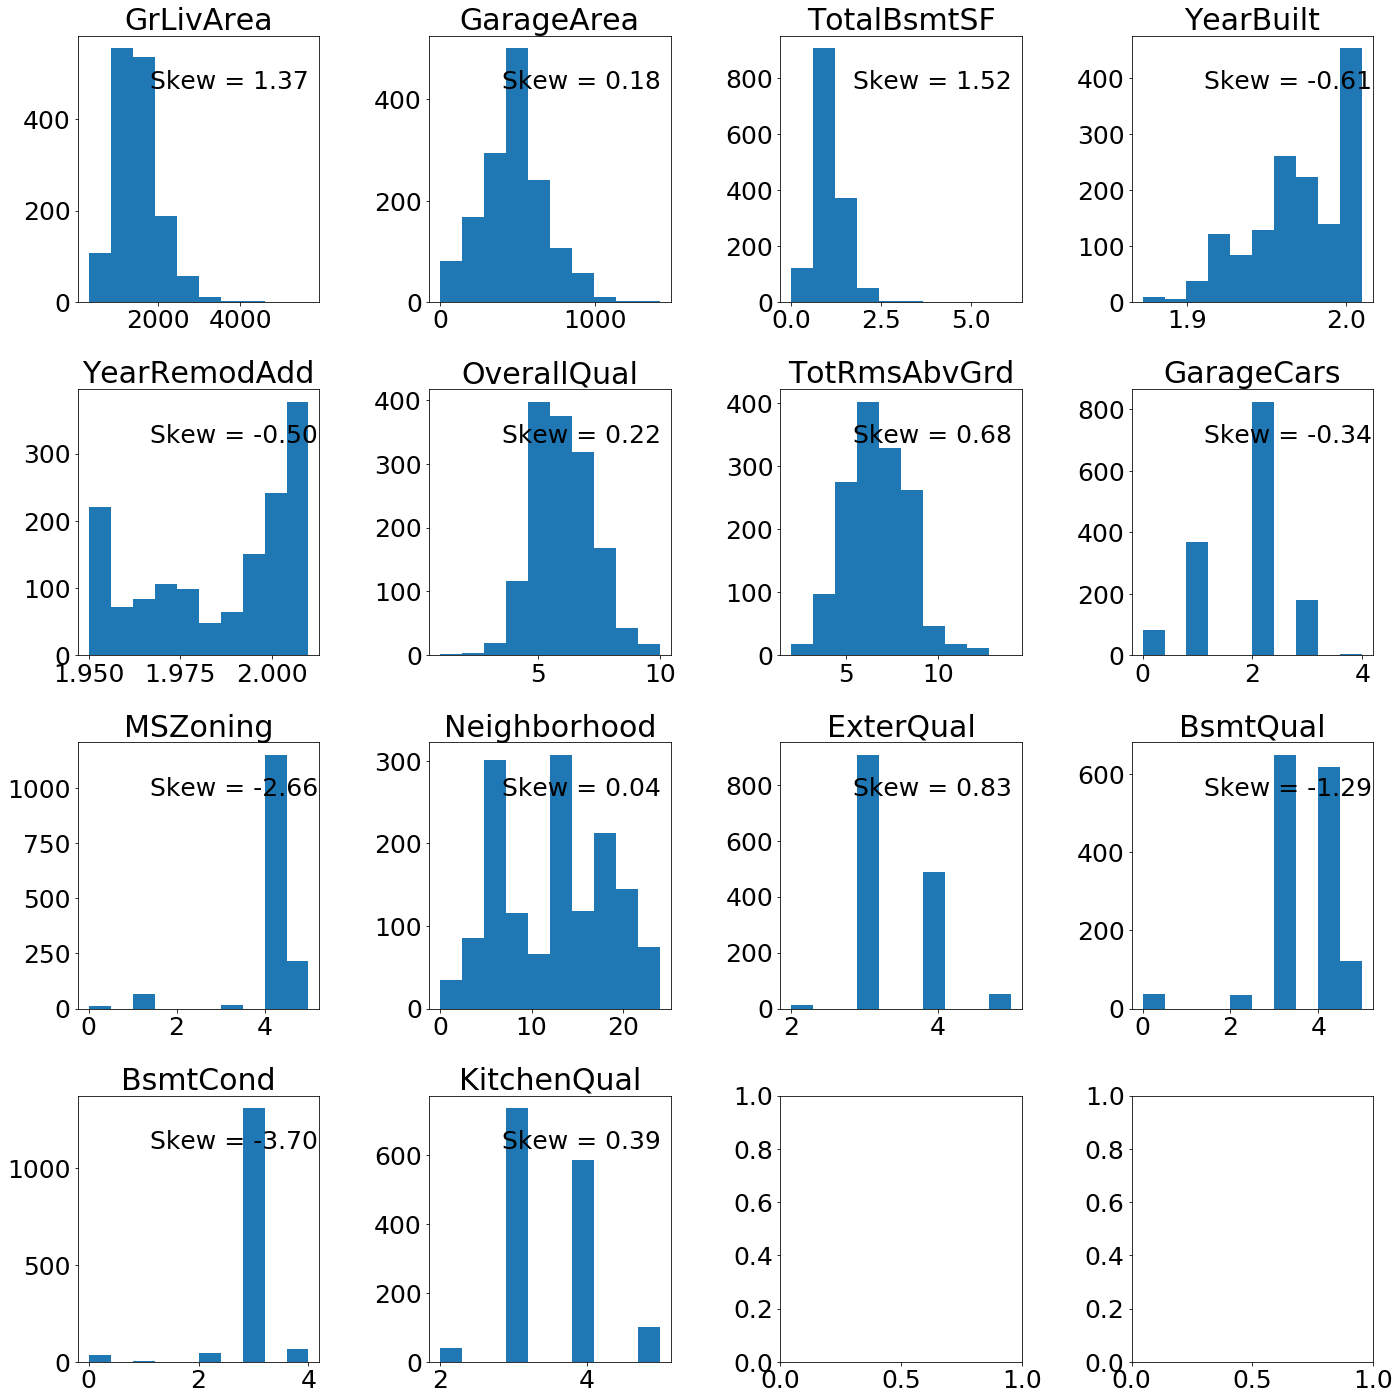

In [34]:
nrows, ncols = 4, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

skew = []
for ivar, var in enumerate(sel_features):
    row = int(ivar/ncols)
    col = ivar%ncols
    axs[row, col].hist(train_init[var])
    axs[row, col].set_title(var)
    skew.append(train_init[var].skew())
    axs[row,col].text(0.3, 0.8, 'Skew = {:.2f}'.format(skew[-1]), transform=axs[row, col].transAxes)
plt.tight_layout()
plt.show()

In [35]:
skewness = pd.DataFrame({
    'feature': sel_features,
    'skewness': skew
})
skewness.sort_values(by=['skewness'], ascending=False)

,feature,skewness
2,TotalBsmtSF,1.524255
0,GrLivArea,1.366560
10,ExterQual,0.825988
6,TotRmsAbvGrd,0.676341
13,KitchenQual,0.386765
5,OverallQual,0.216944
1,GarageArea,0.179981
9,Neighborhood,0.042122
7,GarageCars,-0.342549
4,YearRemodAdd,-0.503562


Nearly half of the features have a highly asymmetric distribution (absolute value of the skewness > 0.7). We symmetrize the distributions with a boxcox function

In [36]:
skewed_features = skewness['feature'][np.abs(skewness['skewness'])>0.7]

for feat in skewed_features:
    train_init[feat] = boxcox(1+train_init[feat])[0]
    test_init[feat]  = boxcox(1+test_init[feat])[0]
        
train_init['SalePrice'] = np.log1p(train_init['SalePrice'])

/home/francesco/.local/lib/python3.5/site-packages/scipy/stats/morestats.py:1031: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


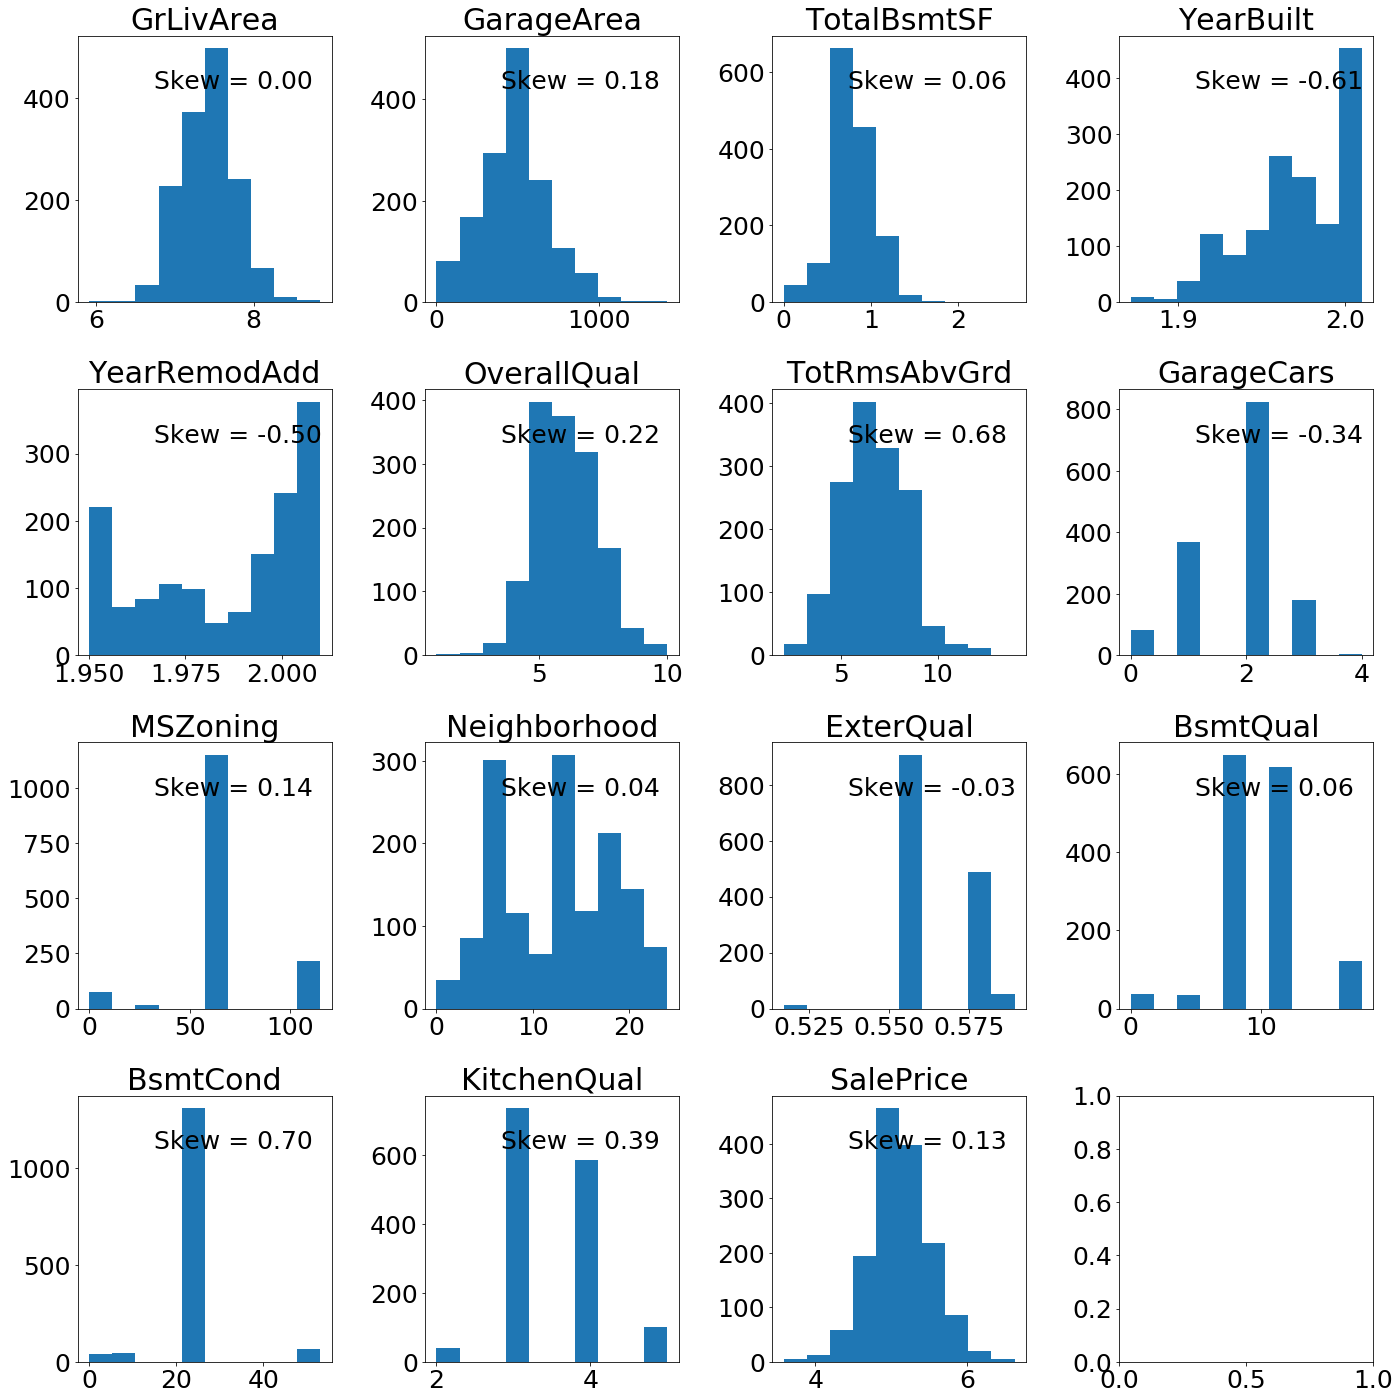

In [37]:
nrows, ncols = 4, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

skew = []
for ivar, var in enumerate(sel_features):
    row = int(ivar/ncols)
    col = ivar%ncols
    axs[row, col].hist(train_init[var])
    axs[row, col].set_title(var)
    skew.append(train_init[var].skew())
    axs[row,col].text(0.3, 0.8, 'Skew = {:.2f}'.format(skew[-1]), transform=axs[row, col].transAxes)

axs[3, 2].hist(train_init['SalePrice'])
axs[3, 2].text(0.3, 0.8, 'Skew = {:.2f}'.format(train_init['SalePrice'].skew()), transform=axs[3, 2].transAxes)
axs[3, 2].set_title('SalePrice')

plt.tight_layout()
plt.show()

All the relevant distributions have now been symmetrized

# 3 Range of Selected Features

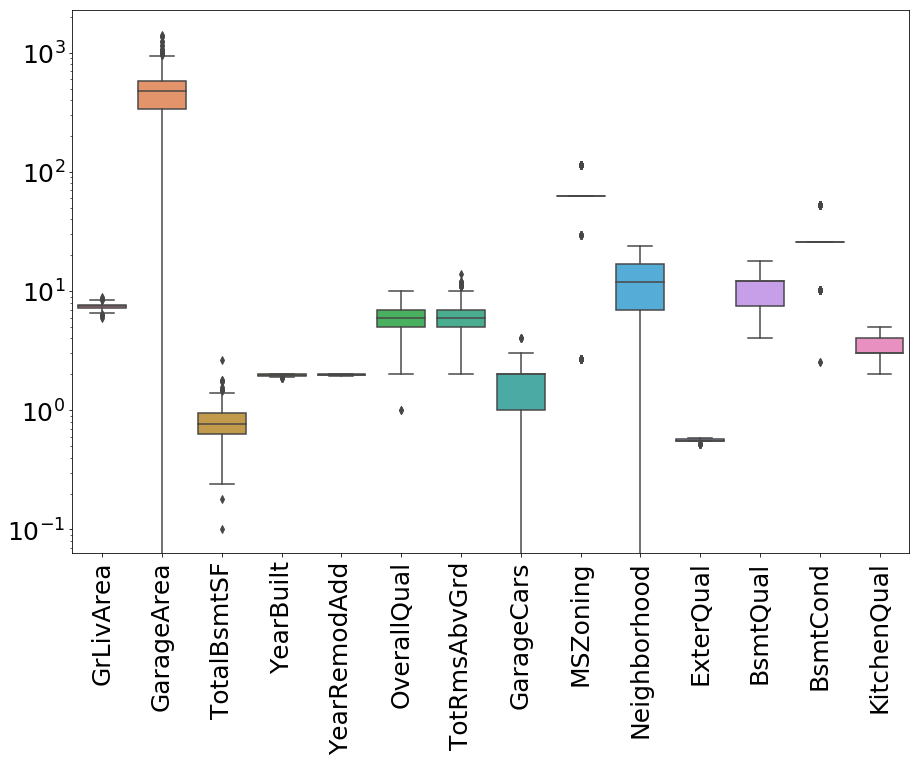

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.boxplot(data=train_init[sel_features])
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

The selected features spans different ranges. Therefore, during the model selection we need to scale them